# Basic Demo

## Introduction

In this Jupyter notebook, we will demonstrate how to use the Brightest Path package to find the brightest path between points in an image. 

### Create and activate a Python virtual environment

```sh
python -m venv env
source env/bin/activate
```

### Installation

Before we get started, let's install the Brightest Path library.

#### Install the library using pip

```sh
pip install --upgrade brightest-path-lib
```

or

#### Install from source

```sh
git clone https://github.com/mapmanager/brightest-path-lib.git
cd brightest-path-lib
pip install -e .
```



#### Install other Python packages for this tutorial

```sh
pip install numpy scikit-image matplotlib pooch
```

### Loading an Image

We'll start by loading an image to find the brightest path on. For this demo, we'll use the `cells3d()` function from the `skimage.data` module to generate a synthetic image of cells. The first time this is run, downloading skimage data can take a few seconds.

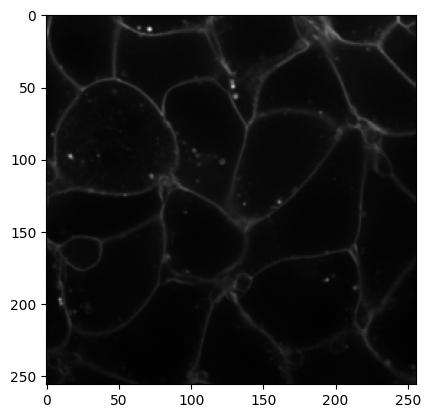

In [1]:
from skimage import data
import matplotlib.pyplot as plt

image = data.cells3d()[30, 0]
plt.imshow(image, cmap='gray')

### Finding the Brightest Path
Now that we have an image, we can use the Brightest Path library to find the brightest path between two points in the image. We'll start by importing the AStarSearch class from the library:

In [2]:
from brightest_path_lib.algorithm import AStarSearch

Next, we'll define the start and end points of the path. Here we are showing the start point as a green circle and the end point as a red circle.

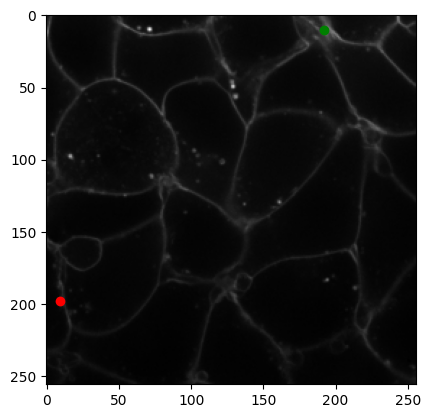

In [3]:
import numpy as np

start_point = np.array([10,192]) # [y, x]
end_point = np.array([198,9])

# let's show the start and end points
plt.imshow(image, cmap='gray')
plt.plot(start_point[1], start_point[0], 'og')
plt.plot(end_point[1], end_point[0], 'or')

Finally, we'll create an instance of the AStarSearch class and call its search method to find the brightest path:

In [4]:
search_algorithm = AStarSearch(image, start_point=start_point, goal_point=end_point)
brightest_path =search_algorithm.search()

### Visualizing the Result

To visualize the result, we'll plot the original image and overlay the brightest path on it:

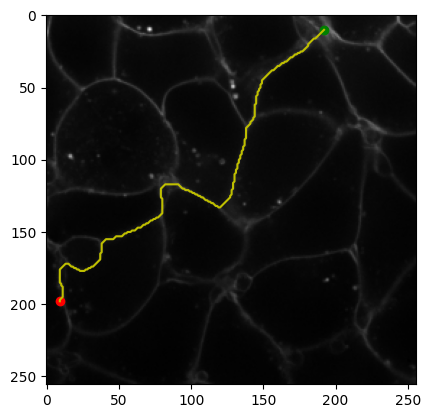

In [5]:
plt.imshow(image, cmap='gray')
plt.plot(start_point[1], start_point[0], 'og')
plt.plot(end_point[1], end_point[0], 'or')
plt.plot([point[1] for point in search_algorithm.result], [point[0] for point in brightest_path], '-y')


Similarly, you can also use the NBA* search algorithm to find the brightest path. Let's see how:

We'll start by importing the AStarSearch class from the library:

In [6]:
from brightest_path_lib.algorithm import NBAStarSearch

Let's use the same start and end points for NBA* Search that we used for A* Search. We'll create an instance of the NBAStarSearch class and call its search method to find the brightest path:

In [9]:
search_algorithm = NBAStarSearch(image, start_point=start_point, goal_point=end_point)
brightest_path =search_algorithm.search()

Let's visualize the result the same way:

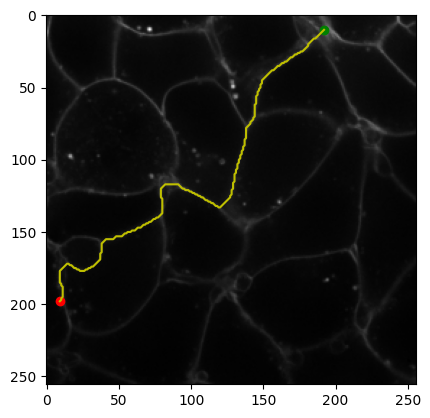

In [10]:
plt.imshow(image, cmap='gray')
plt.plot(start_point[1], start_point[0], 'og')
plt.plot(end_point[1], end_point[0], 'or')
plt.plot([point[1] for point in search_algorithm.result], [point[0] for point in brightest_path], '-y')

In the [next tutorial](threading_notebook.ipynb), we'll use this library to show a visualization of where the algorithm is searching in real-time using Python threads.